# Lecture 14


## Sparse Matrices

* we have used NumPy's ndarray to represent arrays (matrix, vector, etc.)
* NumPy's ndarray stores all the elements of the array
* For matrices with a lot of zeros, ndarray data structure is not an efficient one
* Instead, we use sparse matrices in **scipy.sparse** module
* nonsparse matrices are called dense matrices
* Sparce matrices arise in solving PDEs and many other applications such as network

In [1]:
# import libraries
import scipy.sparse as sp
import scipy.sparse.linalg

import numpy as np
import matplotlib.pyplot as plt


For sparse matrices, we need to store the following information for the nonzero elements
* row indices
* column indices
* values 

There are numerous approaches to organizing the storage of these information; the most commonly used are the following three formats:

|Type | Pros | Cons|
|---   | ---|---|
|Coordinate list (COO, sp.coo_matrix)| simple to construct and efficient to add new elements | Inefficient element access, and inefficient for math operations|
| Compressed sparse column (CSC, sp.csc_matrix)|  efficient column slicing,fast matrix vector products | slow row slicing operations (consider CSR) |
| Compressed sparse row (CSR, sp.csr_matrix)|  efficient row slicing,fast matrix vector products | slow column slicing operations (consider CSC) |




In [2]:
# create a sparse matrix 
values=[1,2,3,4]
rows=[0,1,2,3]
cols=[1,3,2,0]

A=sp.coo_matrix((values,(rows,cols)),shape=[4,4])
B=sp.csc_matrix((values,(rows,cols)),shape=[4,4])
C=sp.csr_matrix((values,(rows,cols)),shape=[4,4])

In [3]:
A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [4]:
B

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Column format>

In [5]:
C

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [6]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [7]:
B.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]], dtype=int64)

In [8]:
C.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]], dtype=int64)

In [9]:
print("COO format:\n",A)
print("CSC format:\n",B)
print("CSR format:\n",C)

COO format:
   (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4
CSC format:
   (3, 0)	4
  (0, 1)	1
  (2, 2)	3
  (1, 3)	2
CSR format:
   (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4


**Access elements**: 
Same syntax as a numpy array, but not all format will work. 

When working with sparse matrix, it is common to face the situation that different tasks - such as constructing, updating and arithmetic operators - are most efficiently handled in different formats. 

Converting between different sparse matric formats is relatively efficient, so it is useful to swith between different formats in different parts of an application

In [10]:
A[1,2] # COO format does not support slicing

TypeError: 'coo_matrix' object is not subscriptable

In [14]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [13]:
A.tocsc()[0:3,2].toarray()

array([[0],
       [0],
       [3]])

For computations, the most efficient formats are CSR and CSC, because they are well suited for efficient matrix arithmetic and linear algebra applications.

Other formats, such as COO, are mainly used for constructing and updating sparse matrices.

Once a sparse matrix is ready to be used in computaton, it is best to convert it to either CSR or CSC, using **tocsr** or **tocsc**

## Functions for creating sparse matrices

In [16]:
N=10
A=sp.eye(N,k=1)-2*sp.eye(N)+sp.eye(N,k=-1)

In [17]:
A # by default the resulting sparse matrix in the CSR format

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [18]:
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

another way of creating this matrix

In [19]:
A=sp.diags([1,-2,1],[1,0,-1],shape=[N,N],format='csc') # we can explicitly specify the format

In [20]:
A

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

In [21]:
print(A)

  (0, 0)	-2.0
  (1, 0)	1.0
  (0, 1)	1.0
  (1, 1)	-2.0
  (2, 1)	1.0
  (1, 2)	1.0
  (2, 2)	-2.0
  (3, 2)	1.0
  (2, 3)	1.0
  (3, 3)	-2.0
  (4, 3)	1.0
  (3, 4)	1.0
  (4, 4)	-2.0
  (5, 4)	1.0
  (4, 5)	1.0
  (5, 5)	-2.0
  (6, 5)	1.0
  (5, 6)	1.0
  (6, 6)	-2.0
  (7, 6)	1.0
  (6, 7)	1.0
  (7, 7)	-2.0
  (8, 7)	1.0
  (7, 8)	1.0
  (8, 8)	-2.0
  (9, 8)	1.0
  (8, 9)	1.0
  (9, 9)	-2.0


In [22]:
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

Visualize the sparse matrix

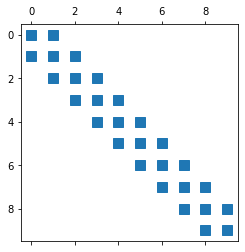

In [23]:
fig,ax=plt.subplots()
ax.spy(A)
plt.show()

### Kronecker Product

In [24]:
B=sp.diags([1,1],[-1,1],shape=[3,3])

In [25]:
B.toarray()

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

In [26]:
C=sp.kron(A,B)

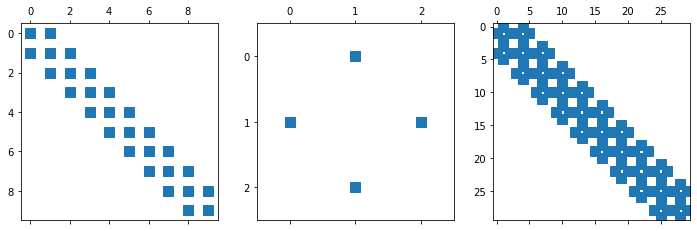

In [27]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
axes[0].spy(A)
axes[1].spy(B)
axes[2].spy(C)
plt.show()



### Solve sparse linear system of equations
solve $Ax=b$, where $A$ is a sparse matrix, using the **sparse.linalg** module

In [28]:
N=10
A=sp.diags([1,-2,1],[1,0,-1],shape=[N,N],format='csc') # we can explicitly specify the format
b=np.zeros(N)
b[-1]=-N-1
x=sp.linalg.spsolve(A,b)
print(x)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [29]:
A.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [30]:
b

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -11.])

Performance comparison: dense vs. sparse

In [33]:
N=10000
A=sp.diags([1,-2,1],[1,0,-1],shape=[N,N],format='csc') # we can explicitly specify the format
Adense=A.toarray()
b=np.zeros(N)
b[-1]=-N-1
import time
# timing sparse matrix solve
start_time = time.process_time()
x=sp.linalg.spsolve(A,b)
print("sparse:%5.3f seconds\n"%(time.process_time() - start_time))


# timing dense matrix solve
start_time = time.process_time()
x=scipy.linalg.solve(Adense,b)
print(" dense:%5.3f seconds\n"%(time.process_time() - start_time))



sparse:0.019 seconds

 dense:58.653 seconds

